<a href="https://colab.research.google.com/github/serialize02/2023final/blob/main/W09_0503_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Week 9.
<br>
Natural Language Processing</h1>

## Tokenization

In [3]:
text = "The quick, brown foxes are jumping over the lazy dogs."

In [4]:
import nltk

nltk= natural language tool kit
자연어 분석을 쉽게 해주는 패키지

In [5]:
# Punkt tokenizer

from nltk.tokenize import word_tokenize
nltk.download("punkt")

words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


word_tokenize -> 단어 단위로 space를 기준으로 토큰을 잘라내는 기능
punkt는 단어 단위로 끊어주는 모델 tokenizer

In [6]:
print(words)

['The', 'quick', ',', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs', '.']


그러나 문장의 자연어 분석을 할 때 문장 부호는 대부분 사용되지 않기 때문에

In [7]:
# Regular expression tokenizer

from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

regexptokenizer 원하는 대로 토큰을 잘라낼 수 있는
대괄호 속의 의미가 -> 알파벳의 연속으로만 된 토큰만 가져와라

In [8]:
print(words)

['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs']


단어 단위의 토큰만 빼낼 수 있음

## Normalization

평준화, 단어의 기본형이 다양한 형태로 변형되는데, 이 다양한 변형형들을 하나로 보고 싶을 때 다 기본형으로 돌려놓는 것

<h3>Stemming</h3>

기본형으로 단어를 되돌려놓는 것
접미사나 접두사를 그냥 잘라버리는 친구

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
norm_words = [stemmer.stem(w) for w in words]

porter stemmer = 접두사나 접미사를 알아서 제거해주는 모델

In [10]:
print(norm_words)

['the', 'quick', 'brown', 'fox', 'are', 'jump', 'over', 'the', 'lazi', 'dog']


foxes -> fox / are 접미사 접두사가 없어서 바뀌지 않음 / jumping -> jump / lazi -> 이렇게 실수하는 경우가 많음

In [11]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
norm_words = [stemmer.stem(w) for w in words]

In [12]:
norm_words

['the', 'quick', 'brown', 'fox', 'ar', 'jump', 'ov', 'the', 'lazy', 'dog']

<h3>Lemmatization</h3>

단어의 기본형 = lemma  / 스테밍으로 돌려지지 않는 단어들은 더 많은 정보가 필요 -> 품사, 기본형이 뭔지
스테밍보다 조금 복잡하지만 더 정확하다
단어의 형태에 대한 지식을 바탕으로 기본형으로 돌려놓는다

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()
norm_words = [lemmatizer.lemmatize(w) for w in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...


wordnet= 단어에 대한 사전정보가 담긴 일종의 데이터베이스

In [14]:
print(norm_words)

['The', 'quick', 'brown', 'fox', 'are', 'jumping', 'over', 'the', 'lazy', 'dog']


아까 stemming 보다 기본형으로 바꾸는 작업이 잘 안된 것 같음 / 동사형들이 제대로 바뀌지 않음

사전 정보, 그리고 단어가 문장에서 어떤 품사, 형태로 쓰이는지 두 정보를 알아야 하는데 두번째 정보가 없기 때문에 정확하지 않은 것임
두번째 정보가 없으면 그냥 n 으로 처리함

## Part-of-speech Tagging

In [15]:
nltk.download("averaged_perceptron_tagger")

pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [16]:
print(pos)

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('foxes', 'NNS'), ('are', 'VBP'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dogs', 'NNS')]


() 는 튜플 -> 첫번째는 우리가 사용하는 토큰, 두번째는 토큰의 pos 정보

In [17]:
norm_words = []

for word, tag in pos:
  t = tag[0].lower()

  if t in ["a", "r", "n", "v"]:
    norm_words.append(lemmatizer.lemmatize(word, t))
    print(f"{word}: {t}")
  else:
    norm_words.append(word)

brown: n
foxes: n
are: v
jumping: v
dogs: n


a=형용사, r=부사, n=명사, v=동사, s=기타

pos 정보까지 더해서 다시 lemmatization

튜플은 안의 데이터를 수정할 수 없는 리스트

for loop을 돌리는데, 튜플의 두개 변수를 따로 빼서 쓰고 싶음 -> 그래서 for word, tag 이렇게 변수를 두 개 쓰는 것 word는 각각의 토큰, tag는 각각의 pos

tag -> pos string의 몇번째 글자를 가져오는 것, ㅣower은 소문자로 바꿔주는 역할 / 이걸 t라는 변수에 담아주는 것

pos 태그가 명사나 동사에 속하는지를 확인하는 것
기본형으로 바꾸는 lemmatization은 주로 명사나 동사일 때만 하면 된다, 보통 나머지는 다 이미 기본형이다

else 는 동사나 명사가 아니라 기본형으로 바꿀 필요가 없을 때 그냥 리스트에 추가하는 것

In [18]:
print(norm_words)

['The', 'quick', 'brown', 'fox', 'be', 'jump', 'over', 'the', 'lazy', 'dog']


## Stopword

사실 상 큰 의미가 없는 (대명사, 전치사, 접속사)

문장에서 큰 의미는 없으나 빈도가 높은 단어들
우리가 텍스트에서 많이 나오는 단어 중심으로 분석할 때 stopword가 방해됨

In [19]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
print(words)

words = [w for w in words if not w in stopwords.words("english")]
print(words)

['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs']
['The', 'quick', 'brown', 'foxes', 'jumping', 'lazy', 'dogs']


w 우리가 만든 토큰 w for w in words -> 우리가 이 토큰을 가지고 뭘 할거다
if not w in stopwords.words -> for loop 안에 들어가는 친구
in ~ -> 영어의 stopword를 모아놓은 리스트 / w가 이 리스트안에 해당하는지를 보는 것
not -> 부정

-> 스탑워즈가 아닌 토큰을 리스트에 쌓아달라

## Collocation & Concordance

<h3>Collocation</h3>

In [21]:
nltk.download("gutenberg")

text = nltk.corpus.gutenberg.raw("carroll-alice.txt")
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


retokenize -> 단어만 가져와라 (알파벳의 연속)

코퍼스 =데이터베이스 뭉치, 그 중 하나의 코퍼스 이름이 구텐베르그 (영문학 작품들이 들어있음)

In [22]:
print(text[:1000])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

In [23]:
print(words[:20])

['Alice', 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get']


In [24]:
nltk.Text(words).collocations()

Mock Turtle; said Alice; March Hare; White Rabbit; Soo oop; thought
Alice; golden key; beautiful Soup; white kid; good deal; kid gloves;
Beau ootiful; Mary Ann; yer honour; three gardeners; play croquet;
Lobster Quadrille; ootiful Soo; great hurry; guinea pigs


특징: 두 단어로 이뤄짐, 이상한 나라의 앨리스에서 함께 자주 나오는 두 단어의 조합
collocation = 같이 쓰이는 두 개 이상의 단어

<h3>Concordance</h3>

In [25]:
nltk.Text(words).concordance("Alice", 79, 10)

Displaying 10 of 398 matches:
 Alice s Adventures in Wonderland by Lewis 
 1865 CHAPTER I Down the Rabbit Hole Alice was beginning to get very tired of s
nd what is the use of a book thought Alice without pictures or conversation So 
g so VERY remarkable in that nor did Alice think it so VERY much out of the way
and looked at it and then hurried on Alice started to her feet for it flashed a
he hedge In another moment down went Alice after it never once considering how 
ipped suddenly down so suddenly that Alice had not a moment to think about stop
rds as she fell past it Well thought Alice to herself after such a fall as this
usand miles down I think for you see Alice had learnt several things of this so
at Latitude or Longitude I ve got to Alice had no idea what Latitude was or Lon


Alice 라는 단어가 나오는 문맥을 뽑아줌, 79 alice라는 단어의 앞뒤로 79자씩 보여달라, 그 중 10개의 경우만 보여달라

alice의 단어검색
이 단어가 어떤 문맥과 배경에서 많이 나왔구나

<h3>Dispersion Plot</h3>

matplotlib. -> 파이썬에서 시각화 하는데 쓰이는 패키지

plt 긴이름을 단축시키는 것 (별명을 지어주는것)

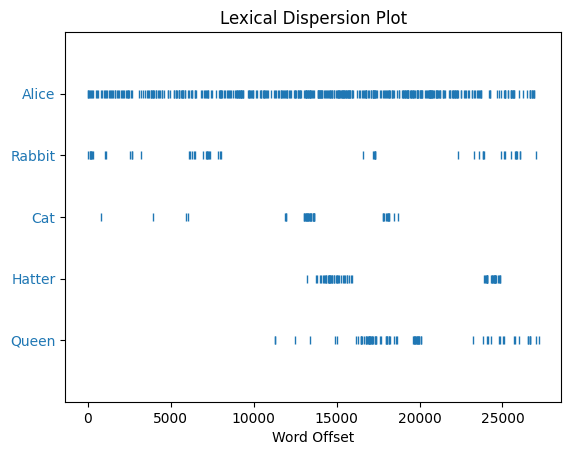

In [26]:
import matplotlib.pyplot as plt

characters = ["Alice", "Rabbit", "Cat", "Hatter", "Queen"]

ax = nltk.draw.dispersion_plot(words, characters, ignore_case=True)
ax.set_yticks(list(range(len(characters))), reversed(characters))

plt.show()

X축은 텍스트의 첫부분 - 끝부분

y축은 등장인물들의 이름

plt.show -> 그래프가 화면에 보여지게 됨

-> dispersion plot 이라고 부름 이걸

In [27]:
nltk.Text(words).similar("Alice")

she it her they he this herself them all speak get and say begin do be
that see one go


alice가 등장한 문맥과 비슷한 문맥에서 동일하게 등장하는 단어들을 뽑아낸 것

In [28]:
nltk.Text(words).common_contexts(["Alice", "she"])

and_was and_looked that_had and_s when_had but_had so_went and_could
and_thought and_heard as_could that_could know_had moment_appeared
so_began time_had moment_felt


alice와 she 가 등장한 동일한 문맥을 뽑아달라

여기까지의 공통점 = 특정 단어의 context를 살펴보는 것

## Frequency Distribution

특정 단어가 텍스트에서 얼마나 많이 나왔는지

In [29]:
text = nltk.corpus.gutenberg.raw("shakespeare-hamlet.txt")
words = retokenize.tokenize(text)

In [30]:
fd = nltk.FreqDist(words).most_common(20)

freqdist -> 빈도를 계산해주는 친구

In [31]:
fd

[('the', 860),
 ('and', 606),
 ('of', 576),
 ('to', 576),
 ('I', 553),
 ('you', 479),
 ('a', 449),
 ('my', 435),
 ('in', 359),
 ('it', 354),
 ('Ham', 337),
 ('is', 304),
 ('not', 286),
 ('his', 266),
 ('And', 257),
 ('that', 257),
 ('your', 233),
 ('this', 232),
 ('me', 227),
 ('d', 223)]

이럴 때 stopword가 제일 많이 나옴

In [32]:
words = [w for w in words if w not in stopwords.words("english")]

In [33]:
fd = nltk.FreqDist(words).most_common(20)

In [34]:
fd

[('I', 553),
 ('Ham', 337),
 ('And', 257),
 ('Lord', 211),
 ('King', 172),
 ('haue', 161),
 ('The', 133),
 ('That', 120),
 ('To', 109),
 ('shall', 104),
 ('But', 103),
 ('Hamlet', 99),
 ('Hor', 95),
 ('What', 95),
 ('thou', 93),
 ('thy', 83),
 ('Enter', 82),
 ('For', 76),
 ('good', 76),
 ('Oh', 76)]

ham -> 햄릿을 줄인 것
희곡의 특징, 대본이라서 햄릿이 그만큼 대사가 많음을 알 수 있음

의미있는 단어들의 빈도수가 등장하는 것이 보임

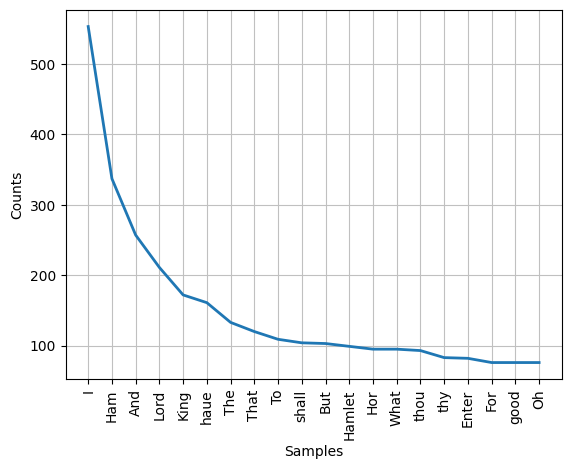

In [35]:
nltk.Text(words).plot(20)

plt.show()

## Wordcloud

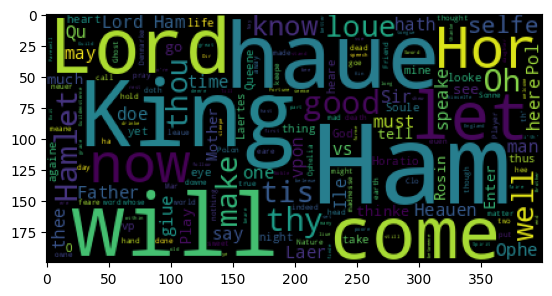

In [36]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud().generate(text)
plt.imshow(wc)

단어들을 모아 시각화시킨 일종의 그래프 (특정 텍스트에서 많이 나온)

토큰이 아닌 생 텍스트로 만든 것

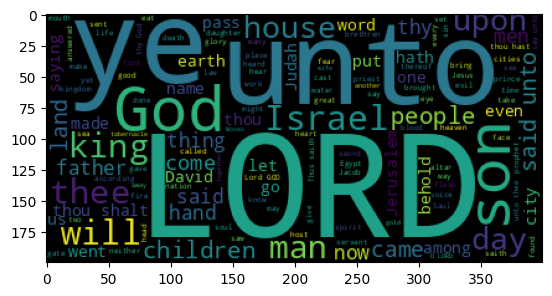

In [37]:
text = nltk.corpus.gutenberg.raw("bible-kjv.txt")

wc = WordCloud().generate(text)
plt.imshow(wc)

가끔 고전 text 분석할 때는 stopword 를 걸러내기 어려운 경우도있다